In [107]:
# Importing all needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


import warnings
warnings.filterwarnings('ignore')

# READING AND UNDERSTANDING DATA

In [122]:
bike=pd.read_csv("C:/Users/lenovo/Downloads/day.csv")

In [123]:
bike.head()               # Displaying the first 5 rows

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [124]:
bike.shape                 # Displaying the shape of the dataframe

(730, 16)

In [125]:
bike.info()                 #Displaying the information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [126]:
bike.drop(["instant","dteday","casual","registered"],inplace=True,axis=1)     # Dropping 

In [127]:
bike.shape

(730, 12)

In [128]:
bike.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

# CREATING DUMMY VARIABLES 

In [129]:
# mapping the season and weekday columns
bike.season = bike.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
bike.weekday=bike.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})


In [130]:
bike.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,mon,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,tue,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,wed,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,thu,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,fri,1,1,9.305237,11.46350,43.6957,12.522300,1600


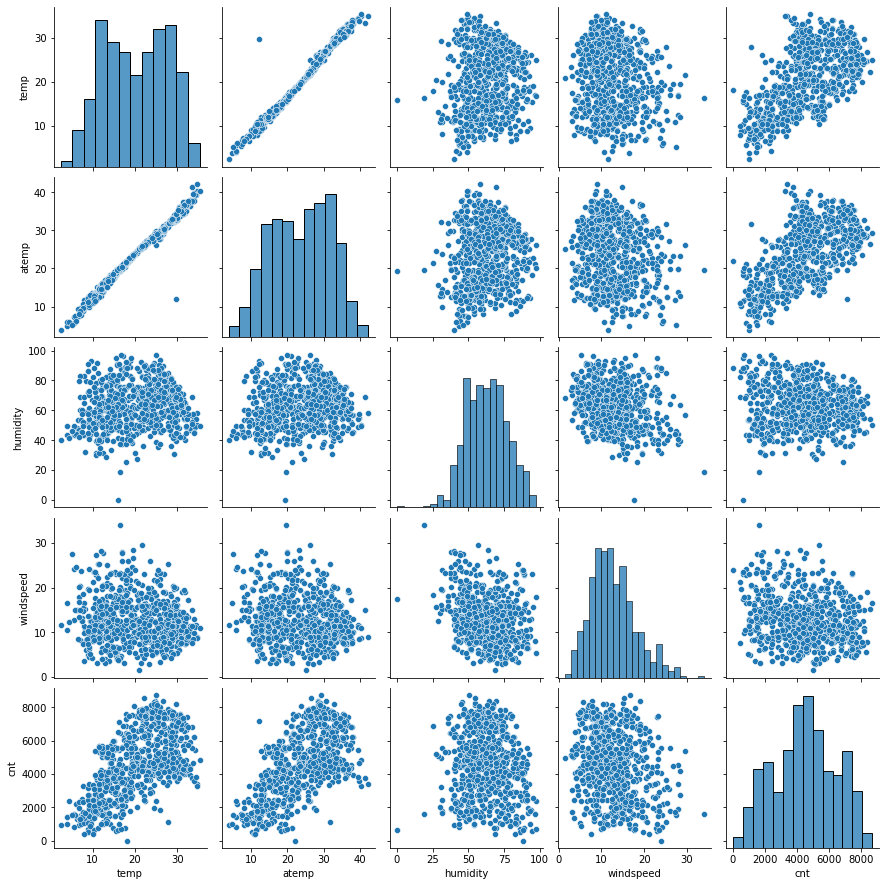

In [131]:
sns.pairplot(data=bike,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

### Observations

1.We can see that alinear relationship between temp and atemp with target variable cnt

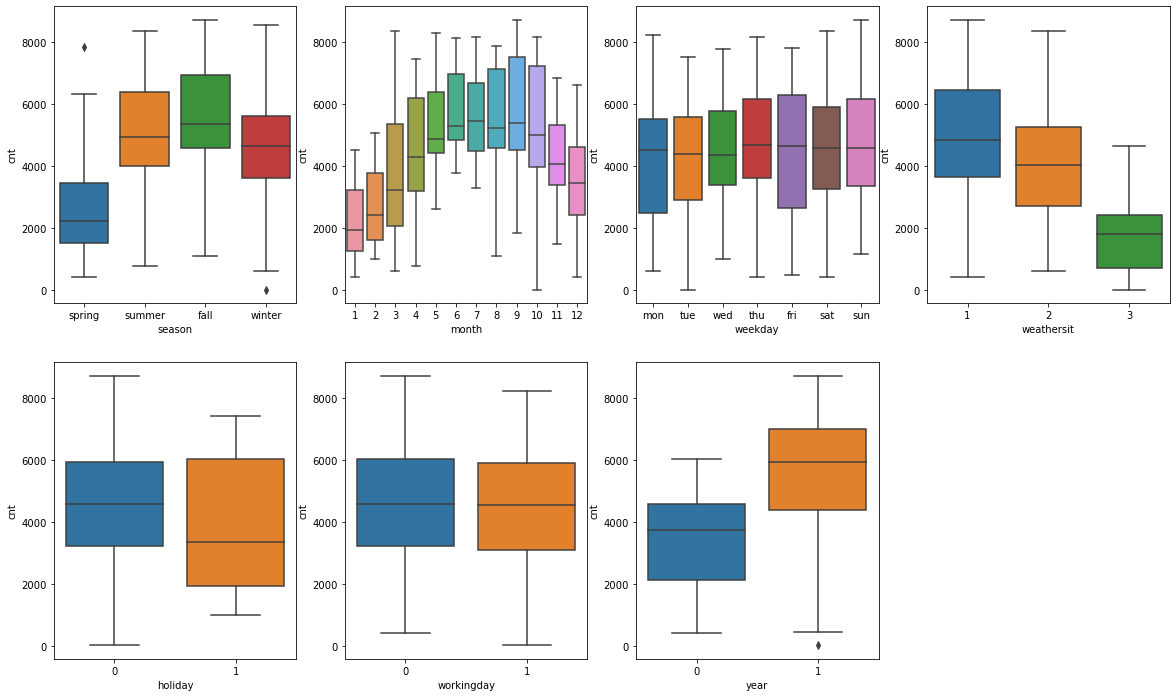

In [132]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = bike)
plt.show()

In [133]:
# making dummy values for weekday and season

weekday_status=pd.get_dummies(bike["weekday"],drop_first=True)
season_status=pd.get_dummies(bike["season"],drop_first=True)



In [134]:
# concatenation

bike=pd.concat([bike,weekday_status,season_status],axis=1)
bike.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
0,spring,0,1,0,mon,1,2,14.110847,18.18125,80.5833,...,985,1,0,0,0,0,0,1,0,0
1,spring,0,1,0,tue,1,2,14.902598,17.68695,69.6087,...,801,0,0,0,0,1,0,1,0,0
2,spring,0,1,0,wed,1,1,8.050924,9.47025,43.7273,...,1349,0,0,0,0,0,1,1,0,0
3,spring,0,1,0,thu,1,1,8.200000,10.60610,59.0435,...,1562,0,0,0,1,0,0,1,0,0
4,spring,0,1,0,fri,1,1,9.305237,11.46350,43.6957,...,1600,0,0,0,0,0,0,1,0,0


In [135]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  mon         730 non-null    uint8  
 13  sat         730 non-null    uint8  
 14  sun         730 non-null    uint8  
 15  thu         730 non-null    uint8  
 16  tue         730 non-null    uint8  
 17  wed         730 non-null    uint8  
 18  spring      730 non-null    uint8  
 19  summer      730 non-null    u

In [136]:
# Dropping of weekday and season column

bike.drop("weekday",axis=1,inplace=True)
bike.drop("season",axis=1,inplace=True)

# EXPLORATORY DATA ANALYSIS

In [137]:
bike.shape

(730, 19)

In [138]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   month       730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   humidity    730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  mon         730 non-null    uint8  
 11  sat         730 non-null    uint8  
 12  sun         730 non-null    uint8  
 13  thu         730 non-null    uint8  
 14  tue         730 non-null    uint8  
 15  wed         730 non-null    uint8  
 16  spring      730 non-null    uint8  
 17  summer      730 non-null    uint8  
 18  winter      730 non-null    uint8  
dtypes: float64(4), int64(6), uint

In [139]:
bike.isnull().mean()* 100      # Checking null value percentage

year          0.0
month         0.0
holiday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
humidity      0.0
windspeed     0.0
cnt           0.0
mon           0.0
sat           0.0
sun           0.0
thu           0.0
tue           0.0
wed           0.0
spring        0.0
summer        0.0
winter        0.0
dtype: float64

##### There is no null values in any columns.Every column has non null values.So there is no need to do missing value process

In [140]:
bike.describe()    # we can see all statistical information of numerical values

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,6.526027,0.028767,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.246575,0.252055,0.243836
std,0.500343,3.450215,0.167266,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.431313,0.434490,0.429689
min,0.000000,1.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,7.000000,0.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Univariate analysis

In [141]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        730 non-null    int64  
 1   month       730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   weathersit  730 non-null    int64  
 5   temp        730 non-null    float64
 6   atemp       730 non-null    float64
 7   humidity    730 non-null    float64
 8   windspeed   730 non-null    float64
 9   cnt         730 non-null    int64  
 10  mon         730 non-null    uint8  
 11  sat         730 non-null    uint8  
 12  sun         730 non-null    uint8  
 13  thu         730 non-null    uint8  
 14  tue         730 non-null    uint8  
 15  wed         730 non-null    uint8  
 16  spring      730 non-null    uint8  
 17  summer      730 non-null    uint8  
 18  winter      730 non-null    uint8  
dtypes: float64(4), int64(6), uint

In [142]:
bike.year.value_counts()

0    365
1    365
Name: year, dtype: int64

In [143]:
bike.month.value_counts()

1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: month, dtype: int64

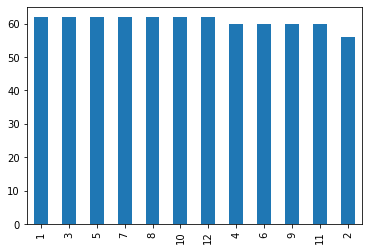

In [144]:
bike.month.value_counts().plot.bar()
plt.show()

In [145]:
bike.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

<AxesSubplot:>

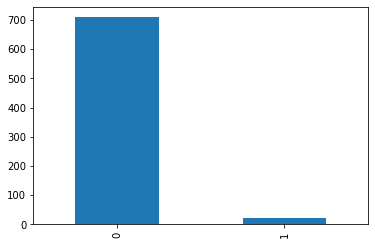

In [146]:
bike.holiday.value_counts().plot.bar()

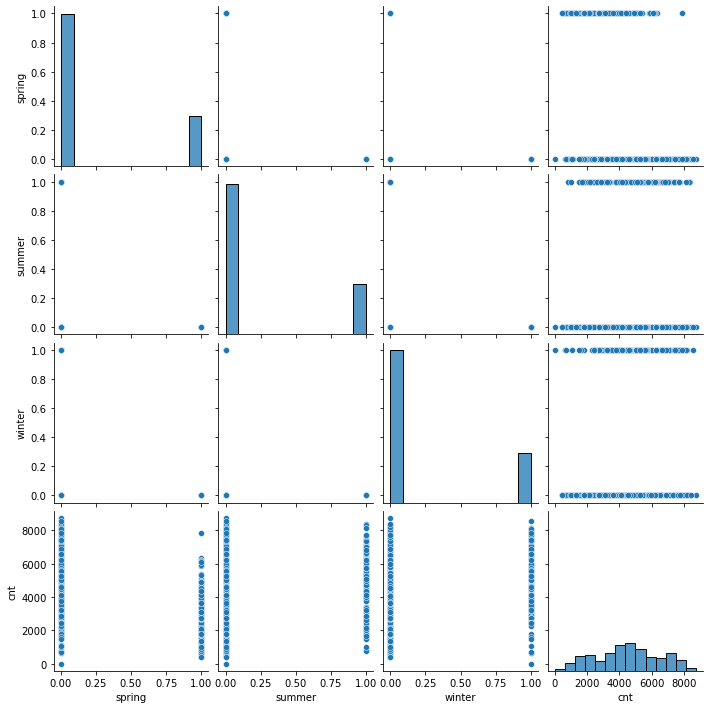

In [147]:
sns.pairplot(data=bike,vars=['spring','summer','winter','cnt'])
plt.show()

In [148]:
bike.workingday.value_counts()

1    504
0    226
Name: workingday, dtype: int64

<AxesSubplot:>

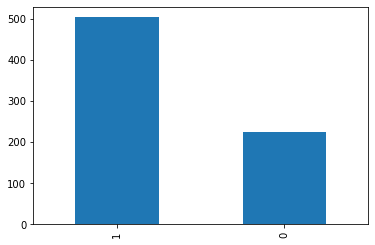

In [149]:
bike.workingday.value_counts().plot.bar()

In [150]:
bike.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

<AxesSubplot:>

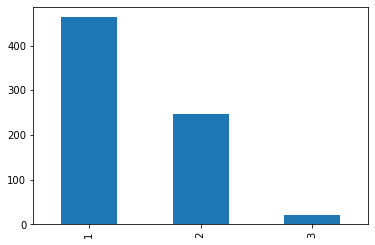

In [151]:
bike.weathersit.value_counts().plot.bar()

<AxesSubplot:>

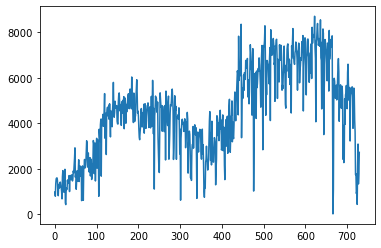

In [152]:
bike.cnt.plot.line()

### Bivariate or multi variate analysis

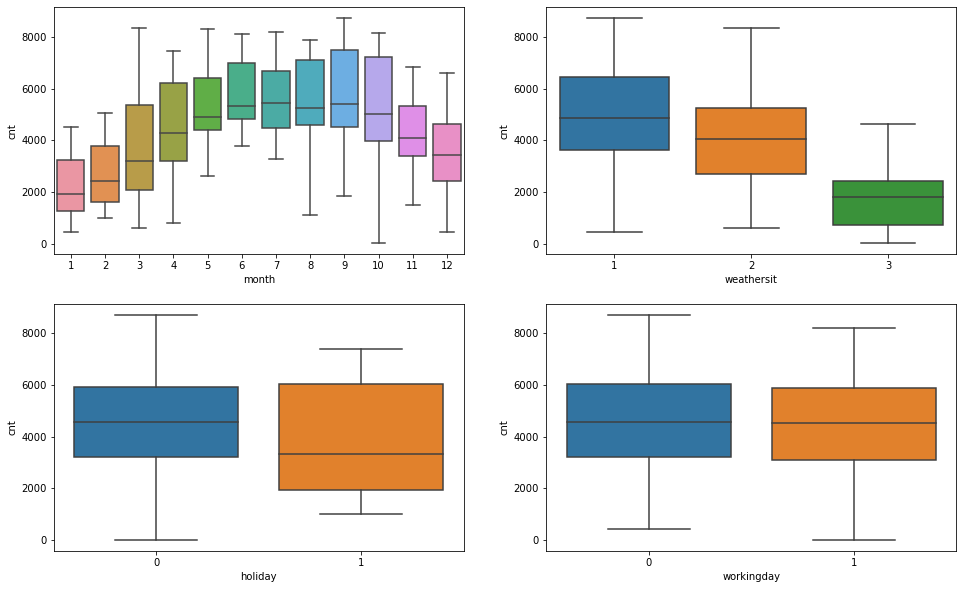

In [153]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'month', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()

### Observation



2.We can see that a gradual increse in bike rental count in the month of 5,6,7,8,9

3.In clear weather people take rental bike more

4.Comparetively  non-holidays choosen for rental bike.This is very clearly seen.

5.In working day more rental bike count increases




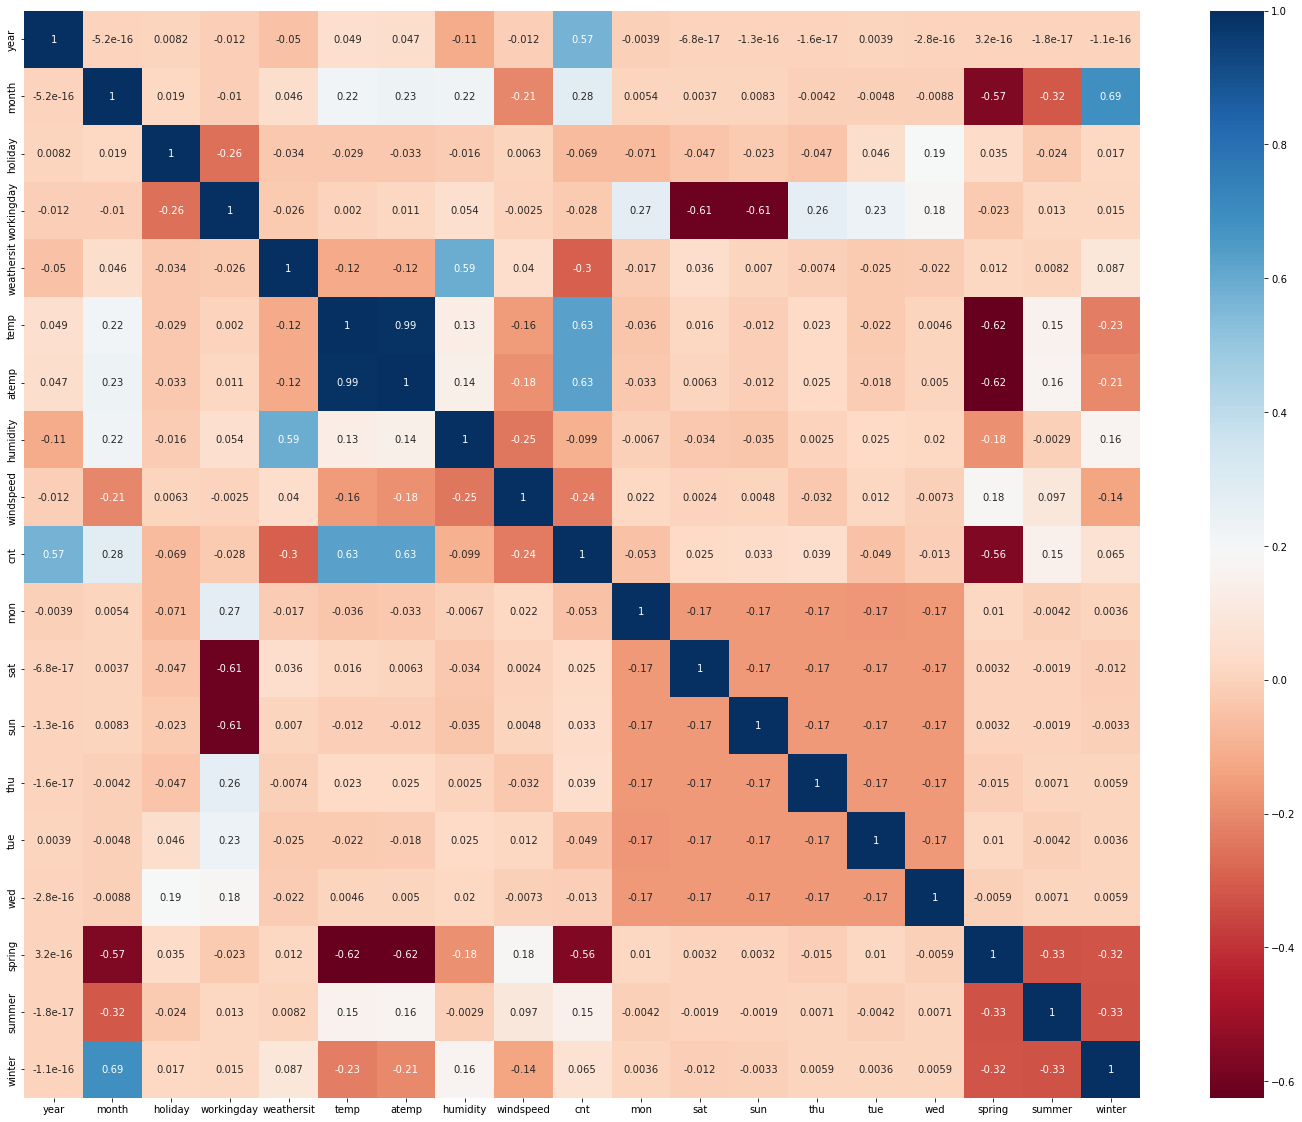

In [154]:
#Checking correlation

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()

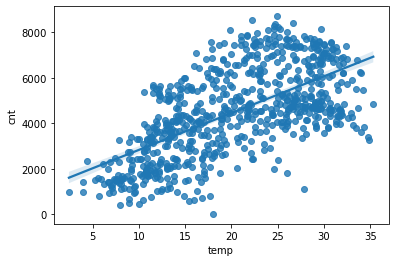

In [155]:
sns.regplot(x="temp",y="cnt",data=bike)
plt.show()

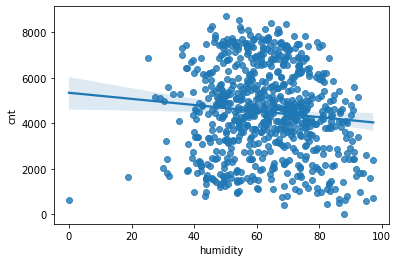

In [156]:
sns.regplot(x="humidity",y="cnt",data=bike)
plt.show()

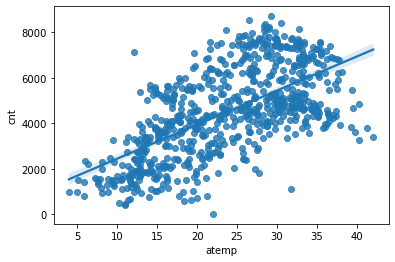

In [157]:
sns.regplot(x="atemp",y="cnt",data=bike)
plt.show()

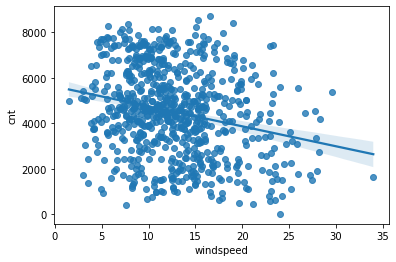

In [158]:
sns.regplot(x="windspeed",y="cnt",data=bike)
plt.show()

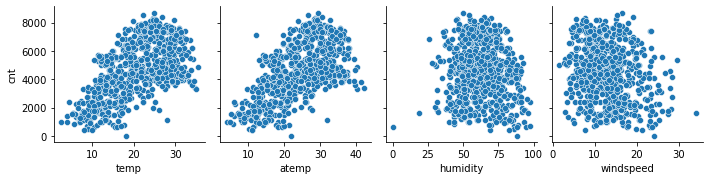

In [159]:
sns.pairplot(data=bike,x_vars=["temp","atemp","humidity","windspeed"],y_vars="cnt")
plt.show()

### OBSERVATION

1.temp and atemp predictor variable shows linear relatioship with response variable cnt.

2.humidity and windspeed are not good predictor variables for cnt.The values are spraded in the right side humidity 
    and spreaded in left side in windspeed

# SPLITTING THE DATA

In [160]:
df_train,df_test=train_test_split(bike,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 19)
(220, 19)


In [161]:
bike.head()

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
0,0,1,0,1,2,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0
1,0,1,0,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1,0,1,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,1,1,0,0
3,0,1,0,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,1,0,0
4,0,1,0,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,1,0,0


# TRAINING THE DATA

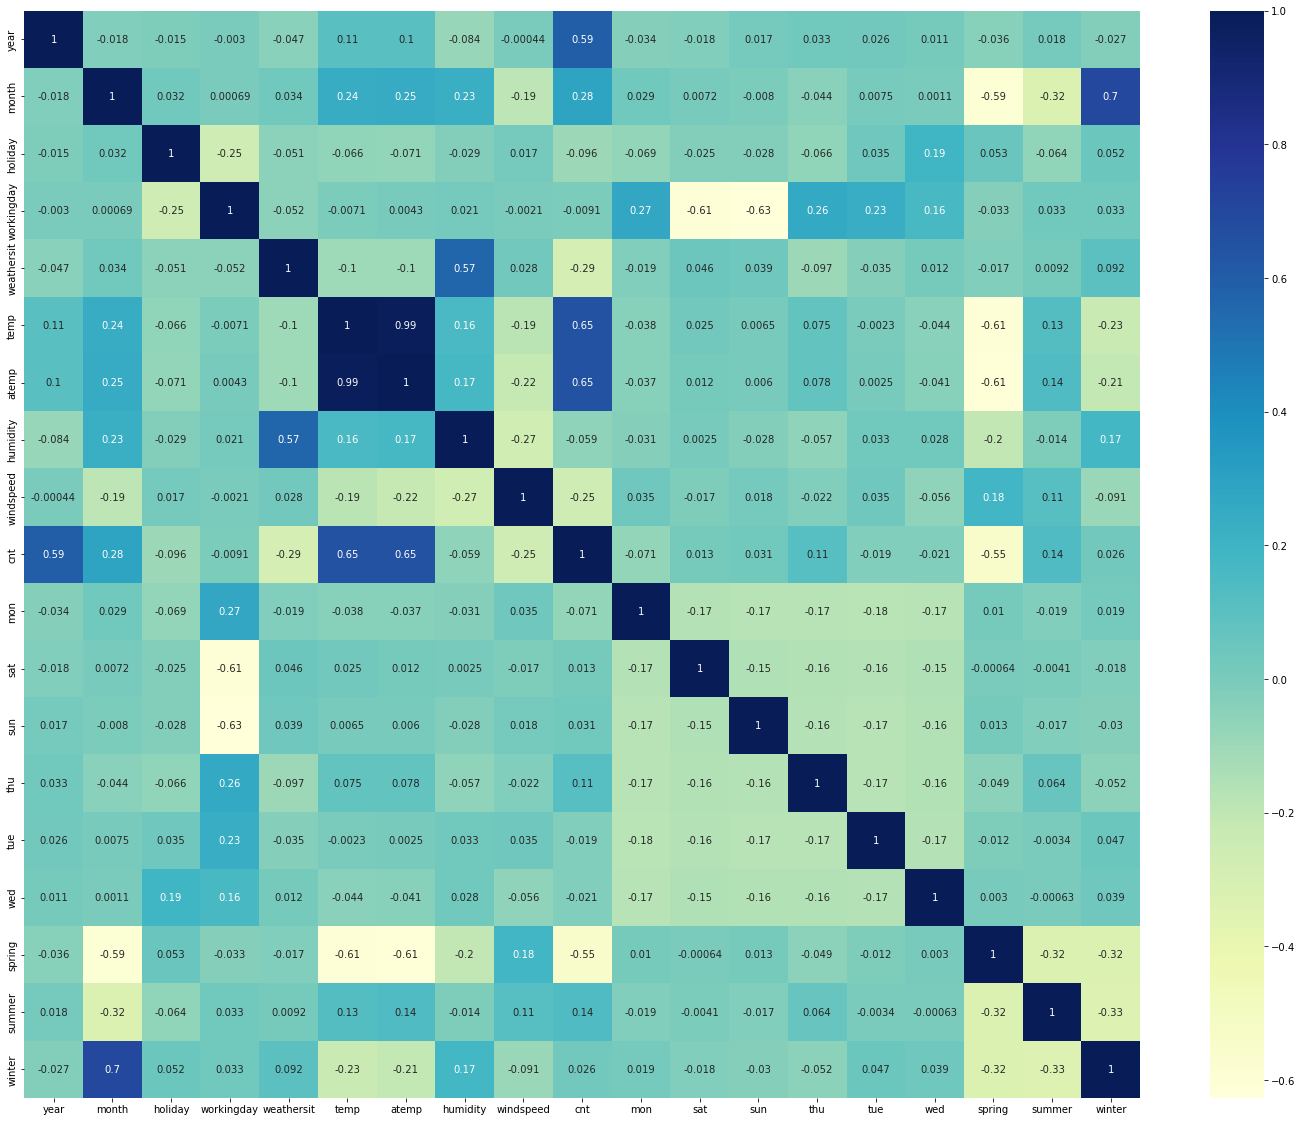

In [162]:
# Checking correlation between variables in train set


plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

#### Observations

1.The target variable "cnt" highly correlatd with the predictor variable year,month,temp and atemp

2.There are predictor variables correlated with each other

# BUILDING LINEAR MODEL

### Adding all variables to the model

In [163]:
df_train.head()

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
576,1,7,0,1,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,0,0,0,1,0,0,0
426,1,3,0,0,2,16.980847,20.6746,62.1250,10.792293,4066,0,0,1,0,0,0,1,0,0
728,1,12,0,1,1,10.489153,11.5850,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0
482,1,4,0,0,2,15.443347,18.8752,48.9583,8.708325,4220,0,0,1,0,0,0,0,1,0
111,0,4,0,0,2,13.803347,16.0977,72.9583,14.707907,1683,0,0,1,0,0,0,0,1,0


In [164]:
df_test.head()


,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
184,0,7,1,0,2,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,1,0,0,0
535,1,6,0,1,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0,0,0,1,0
299,0,10,0,0,2,19.270000,22.85230,81.2917,13.250121,2659,0,1,0,0,0,0,0,0,1
221,0,8,0,1,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0
152,0,6,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,1,0


In [165]:
bike.columns

Index(['year', 'month', 'holiday', 'workingday', 'weathersit', 'temp', 'atemp',
       'humidity', 'windspeed', 'cnt', 'mon', 'sat', 'sun', 'thu', 'tue',
       'wed', 'spring', 'summer', 'winter'],
      dtype='object')

In [166]:
bike.shape

(730, 19)

In [167]:
y_train = df_train.pop('cnt')
X_train = df_train

In [168]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [169]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('month', False, 3),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('humidity', False, 4),
 ('windspeed', True, 1),
 ('mon', True, 1),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', True, 1),
 ('tue', True, 1),
 ('wed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [170]:
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'weathersit', 'temp', 'windspeed',
       'mon', 'sat', 'sun', 'thu', 'tue', 'wed', 'spring', 'summer', 'winter'],
      dtype='object')

In [171]:
X_train.columns[~rfe.support_]

Index(['month', 'atemp', 'humidity'], dtype='object')

In [172]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [121]:
# VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
2,workingday,42.21
4,temp,23.26
8,sun,8.26
7,sat,7.94
3,weathersit,7.58
5,windspeed,7.44
12,spring,5.17
14,winter,3.69
13,summer,2.58
1,holiday,2.10


In [173]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     150.7
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.65e-173
Time:                        16:25:20   Log-Likelihood:                -4148.7
No. Observations:                 510   AIC:                             8329.
Df Residuals:                     494   BIC:                             8397.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3355.1008    743.933      4.510      0.000    1893.438    4816.763
year        2043.1785     75.175     27.179      0.000    1895.477    2190.880
holiday    -1242.5938    605.184     -2.053      0.041   -2431.646     -53.542
workingday  -616.3579    659.993     -0.934      0.351   -1913.097     680.382
weathersit  -837.9917     69.336    -12.086      0.000    -974.222    -701.761
temp         121.3948      9.109     13.327      0.000     103.498     139.292
windspeed    -45.4053      7.323     -6.200      0.000     -59.794     -31.017
mon         -210.2999    135.575     -1.551      0.122    -476.674      56.074
sat         -534.8821    665.261     -0.804      0.422   -1841.972     772.208
sun         -457.6738    665.252     -0.688      0.492   -1764.745     849.398
thu           85.7694    139.107      0.617      0.538    -187.545     359.084
tue         -224.6862    136.335     -1.648      0.100    -492.554      43.181
wed          -61.6164    142.205     -0.433      0.665    -341.018     217.785
spring      -711.3629    183.907     -3.868      0.000   -1072.699    -350.027
summer       358.0850    123.213      2.906      0.004     115.998     600.172
winter       650.5961    148.547      4.380      0.000     358.734     942.458
==============================================================================
Omnibus:                       68.982   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.363
Skew:                          -0.685   Prob(JB):                     5.05e-39
Kurtosis:                       5.534   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 2

In [174]:
# Removing working day with high p value

X_train_new = X_train_rfe.drop(["workingday"], axis = 1)

In [175]:
# Checking VIF for new model

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,8.12
4,windspeed,6.86
2,weathersit,6.82
11,spring,2.71
13,winter,2.17
0,year,2.07
12,summer,2.03
9,tue,1.97
5,mon,1.93
8,thu,1.90


In [176]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [177]:
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     161.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          3.16e-174
Time:                        16:31:43   Log-Likelihood:                -4149.1
No. Observations:                 510   AIC:                             8328.
Df Residuals:                     495   BIC:                             8392.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2728.9444    322.271      8.468      0.000    2095.757    3362.132
year        2047.2794     75.037     27.284      0.000    1899.850    2194.709
holiday     -724.6545    242.165     -2.992      0.003   -1200.452    -248.857
weathersit  -834.6196     69.233    -12.055      0.000    -970.647    -698.592
temp         121.7250      9.101     13.375      0.000     103.844     139.606
windspeed    -45.7134      7.315     -6.249      0.000     -60.085     -31.342
mon         -210.7047    135.557     -1.554      0.121    -477.042      55.633
sat           72.1597    141.580      0.510      0.611    -206.012     350.331
sun          149.7769    139.509      1.074      0.284    -124.327     423.880
thu           84.5448    139.083      0.608      0.544    -188.721     357.811
tue         -221.4231    136.272     -1.625      0.105    -489.167      46.321
wed          -52.5581    141.856     -0.371      0.711    -331.271     226.155
spring      -702.7858    183.653     -3.827      0.000   -1063.622    -341.949
summer       359.7232    123.185      2.920      0.004     117.693     601.753
winter       645.8982    148.443      4.351      0.000     354.243     937.554
==============================================================================
Omnibus:                       68.542   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.214
Skew:                          -0.687   Prob(JB):                     4.02e-38
Kurtosis:                       5.493   Cond. No.                         258.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 3 

In [178]:
# Removing wed variable with high p value

X_train_new = X_train_new.drop(["wed"], axis = 1)

In [179]:
# VIF

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.25
4,windspeed,6.85
2,weathersit,6.79
10,spring,2.56
0,year,2.07
12,winter,2.06
11,summer,1.98
5,mon,1.54
9,tue,1.54
8,thu,1.52


In [180]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# summary of the linear regression model obtained
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     174.2
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.51e-175
Time:                        16:37:36   Log-Likelihood:                -4149.2
No. Observations:                 510   AIC:                             8326.
Df Residuals:                     496   BIC:                             8386.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2700.7264    312.870      8.632      0.000    2086.013    3315.440
year        2046.3335     74.928     27.311      0.000    1899.118    2193.549
holiday     -738.0778    239.231     -3.085      0.002   -1208.109    -268.047
weathersit  -834.0138     69.154    -12.060      0.000    -969.885    -698.143
temp         121.8149      9.090     13.401      0.000     103.956     139.674
windspeed    -45.5952      7.302     -6.245      0.000     -59.941     -31.250
mon         -186.3228    118.408     -1.574      0.116    -418.967      46.321
sat           96.6985    125.024      0.773      0.440    -148.944     342.341
sun          174.2994    122.703      1.421      0.156     -66.781     415.380
thu          109.0950    122.178      0.893      0.372    -130.955     349.145
tue         -196.4574    118.344     -1.660      0.098    -428.975      36.060
spring      -701.4861    183.460     -3.824      0.000   -1061.941    -341.031
summer       359.0450    123.064      2.918      0.004     117.253     600.837
winter       645.7183    148.313      4.354      0.000     354.320     937.117
==============================================================================
Omnibus:                       68.389   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.010
Skew:                          -0.685   Prob(JB):                     4.45e-38
Kurtosis:                       5.493   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 4

In [181]:
# Removing sat variable with high p value

X_train_new = X_train_new.drop(["sat"], axis = 1)

In [182]:
#VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.87
4,windspeed,6.84
2,weathersit,6.77
9,spring,2.52
0,year,2.07
11,winter,2.04
10,summer,1.97
8,tue,1.38
5,mon,1.37
7,thu,1.37


In [183]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# summary of the linear regression model obtained
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     188.8
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.41e-176
Time:                        16:41:08   Log-Likelihood:                -4149.5
No. Observations:                 510   AIC:                             8325.
Df Residuals:                     497   BIC:                             8380.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2726.9036    310.908      8.771      0.000    2116.047    3337.760
year        2045.7471     74.894     27.315      0.000    1898.599    2192.895
holiday     -751.7401    238.482     -3.152      0.002   -1220.296    -283.184
weathersit  -833.4687     69.122    -12.058      0.000    -969.277    -697.661
temp         121.9912      9.083     13.430      0.000     104.145     139.838
windspeed    -45.5129      7.298     -6.237      0.000     -59.851     -31.175
mon         -217.2524    111.406     -1.950      0.052    -436.137       1.633
sun          143.3936    115.967      1.237      0.217     -84.452     371.239
thu           77.9943    115.325      0.676      0.499    -148.590     304.578
tue         -226.8760    111.573     -2.033      0.043    -446.089      -7.663
spring      -701.0487    183.385     -3.823      0.000   -1061.354    -340.743
summer       358.4281    123.012      2.914      0.004     116.741     600.116
winter       644.9122    148.249      4.350      0.000     353.640     936.184
==============================================================================
Omnibus:                       67.955   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.631
Skew:                          -0.678   Prob(JB):                     3.26e-38
Kurtosis:                       5.507   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 5

In [184]:
# Removing thu variable with high p value

X_train_new = X_train_new.drop(["thu"], axis = 1)

In [185]:
# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,6.82
2,weathersit,6.74
3,temp,6.48
8,spring,2.48
0,year,2.07
10,winter,2.02
9,summer,1.95
5,mon,1.28
7,tue,1.28
6,sun,1.25


In [186]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# summary of the linear regression model obtained
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     206.1
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.06e-177
Time:                        16:46:50   Log-Likelihood:                -4149.7
No. Observations:                 510   AIC:                             8323.
Df Residuals:                     498   BIC:                             8374.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2751.7292    308.565      8.918      0.000    2145.479    3357.979
year        2047.0592     74.828     27.357      0.000    1900.042    2194.077
holiday     -765.9145    237.429     -3.226      0.001   -1232.401    -299.428
weathersit  -838.5292     68.679    -12.209      0.000    -973.465    -703.593
temp         122.0797      9.077     13.449      0.000     104.245     139.914
windspeed    -45.4600      7.293     -6.233      0.000     -59.790     -31.130
mon         -237.7751    107.135     -2.219      0.027    -448.268     -27.282
sun          123.2649    112.021      1.100      0.272     -96.828     343.358
tue         -247.1357    107.417     -2.301      0.022    -458.183     -36.088
spring      -702.7756    183.267     -3.835      0.000   -1062.848    -342.703
summer       360.2968    122.914      2.931      0.004     118.803     601.791
winter       643.5974    148.156      4.344      0.000     352.510     934.685
==============================================================================
Omnibus:                       68.255   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.062
Skew:                          -0.681   Prob(JB):                     2.63e-38
Kurtosis:                       5.508   Cond. No.                         248.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model 6

In [187]:
# Removing sun variable with high p value

X_train_new = X_train_new.drop(["sun"], axis = 1)

In [188]:
# VIF check

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,6.80
2,weathersit,6.71
3,temp,6.43
7,spring,2.48
0,year,2.07
9,winter,2.02
8,summer,1.95
5,mon,1.23
6,tue,1.23
1,holiday,1.04


In [189]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_new)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

# Check the parameters obtained

lr6.params

const         2776.001258
year          2048.467916
holiday       -775.394139
weathersit    -836.407015
temp           121.916305
windspeed      -45.166124
mon           -262.580881
tue           -271.389449
spring        -707.142094
summer         354.699994
winter         638.353880
dtype: float64

In [190]:
# summary of the linear regression model obtained
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     226.5
Date:                Tue, 02 May 2023   Prob (F-statistic):          2.43e-178
Time:                        16:50:57   Log-Likelihood:                -4150.3
No. Observations:                 510   AIC:                             8323.
Df Residuals:                     499   BIC:                             8369.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2776.0013    307.841      9.018      0.000    2171.177    3380.825
year        2048.4679     74.833     27.374      0.000    1901.442    2195.494
holiday     -775.3941    237.323     -3.267      0.001   -1241.670    -309.118
weathersit  -836.4070     68.666    -12.181      0.000    -971.317    -701.497
temp         121.9163      9.078     13.430      0.000     104.080     139.752
windspeed    -45.1661      7.290     -6.196      0.000     -59.489     -30.843
mon         -262.5809    104.759     -2.507      0.013    -468.403     -56.758
tue         -271.3894    105.154     -2.581      0.010    -477.989     -64.790
spring      -707.1421    183.263     -3.859      0.000   -1067.205    -347.080
summer       354.7000    122.835      2.888      0.004     113.363     596.037
winter       638.3539    148.110      4.310      0.000     347.357     929.350
==============================================================================
Omnibus:                       64.372   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.217
Skew:                          -0.636   Prob(JB):                     4.89e-37
Kurtosis:                       5.501   Cond. No.                         247.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observation

This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).R2 value is 81.9% which very good value and prob(F-statistics) value is small

# RESIDUAL ANALYSIS AND PREDICTION & VALIDATION

In [191]:
y_train_pred = lr6.predict(X_train_lm6)

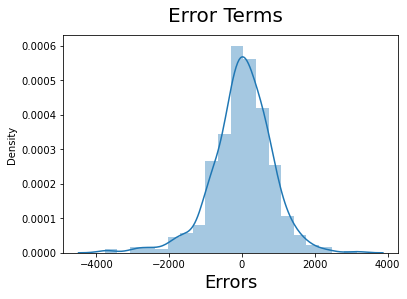

In [193]:
# Residual calculation

res = y_train-y_train_pred

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

### Observation

From the above histogram, we could see that the Residuals are normally distributed with mean 0. Hence our assumption for Linear Regression is valid.

In [194]:
#VIF check on train data

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,6.80
2,weathersit,6.71
3,temp,6.43
7,spring,2.48
0,year,2.07
9,winter,2.02
8,summer,1.95
5,mon,1.23
6,tue,1.23
1,holiday,1.04


In [195]:
df_test.head()

,year,month,holiday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt,mon,sat,sun,thu,tue,wed,spring,summer,winter
184,0,7,1,0,2,29.793347,33.27085,63.7917,5.459106,6043,0,0,0,0,0,1,0,0,0
535,1,6,0,1,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,0,1,0,0,0,1,0
299,0,10,0,0,2,19.270000,22.85230,81.2917,13.250121,2659,0,1,0,0,0,0,0,0,1
221,0,8,0,1,1,31.433347,34.24915,42.4167,13.417286,4780,0,0,0,0,0,0,0,0,0
152,0,6,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,1,0,0,0,0,0,1,0


In [196]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   year        220 non-null    int64  
 1   month       220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   workingday  220 non-null    int64  
 4   weathersit  220 non-null    int64  
 5   temp        220 non-null    float64
 6   atemp       220 non-null    float64
 7   humidity    220 non-null    float64
 8   windspeed   220 non-null    float64
 9   mon         220 non-null    uint8  
 10  sat         220 non-null    uint8  
 11  sun         220 non-null    uint8  
 12  thu         220 non-null    uint8  
 13  tue         220 non-null    uint8  
 14  wed         220 non-null    uint8  
 15  spring      220 non-null    uint8  
 16  summer      220 non-null    uint8  
 17  winter      220 non-null    uint8  
dtypes: float64(4), int64(5), uint8(9)
memory usage: 19.1 KB


In [197]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm6 = sm.add_constant(X_test)
X_test_lm6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   const       220 non-null    float64
 1   year        220 non-null    int64  
 2   holiday     220 non-null    int64  
 3   weathersit  220 non-null    int64  
 4   temp        220 non-null    float64
 5   windspeed   220 non-null    float64
 6   mon         220 non-null    uint8  
 7   tue         220 non-null    uint8  
 8   spring      220 non-null    uint8  
 9   summer      220 non-null    uint8  
 10  winter      220 non-null    uint8  
dtypes: float64(3), int64(3), uint8(5)
memory usage: 13.1 KB


In [198]:
# Making predictions using the final model (lr6)

y_pred = lr6.predict(X_test_lm6)

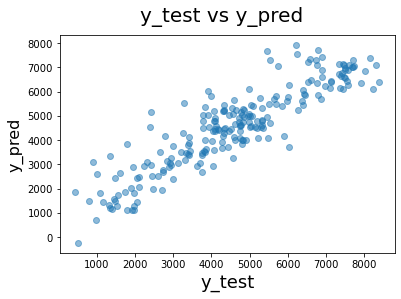

In [199]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [200]:
# R2 value for test data

r2_score(y_test, y_pred)

0.8017413781062942

In [203]:
# We already have the value of R^2 (calculated in above step)

r2=0.8203092200749708

In [204]:
# Get the shape of X_test
X_test.shape

(220, 10)

In [205]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjustedr2 = 1-(1-r2)*(n-1)/(n-p-1)
adjustedr2

0.8117115751024814

# Observation

1.Train R^2 :0.819

2.Train Adjusted R^2 :0.816

3.Test R^2 :0.820

4.Test Adjusted R^2 :0.811

This seems to be a really good model that can very well 'Generalize' various datasets.

# CONCLUSION

*--Demand of bikes depend on year, holiday, temp, windspeed, Monday,Tuesday, spring, summer and winter.